/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


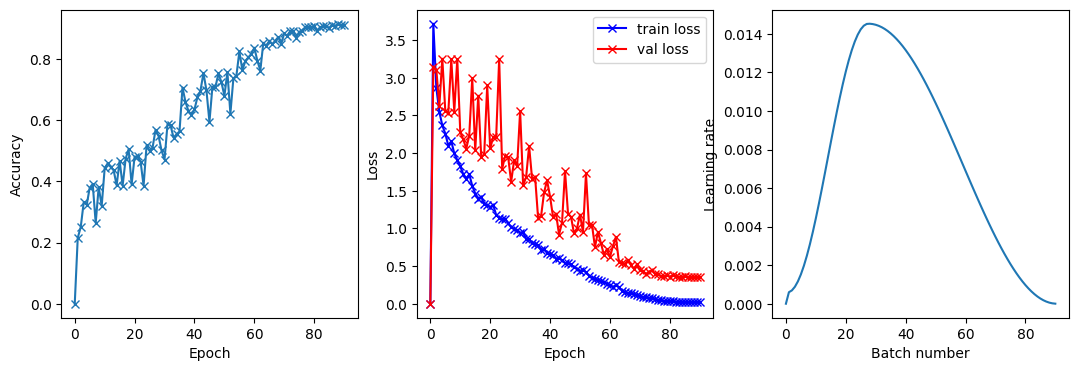

In [1]:
import misc
import pandas as pd

history = pd.read_csv('./output/resnet50_flowers_91.2acc_90epochs_onecycle.csv')
misc.plot_history(history)

In [1]:
import datasets.cub as cub
import datasets.flowers as flowers
from datasets.transforms import train_transform, test_transform
from torch.utils.data import DataLoader

datasets = cub.get_datasets(download=False)

train = DataLoader(datasets['train'], batch_size=64, shuffle=False)
unknown = DataLoader(datasets['test_unknown'], batch_size=64)
val = DataLoader(datasets['val'], batch_size=64)
known = DataLoader(datasets['test_known'], batch_size=64)

/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
len(datasets['test_unknown'])

793

In [5]:
class_dict = dict()
for X,y in datasets['test_known']:
    if y in class_dict:
        class_dict[y] += 1
    else:
        class_dict[y] = 1

(array([15., 27., 18., 15.,  2.,  6.,  3.,  3.,  1.,  1.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

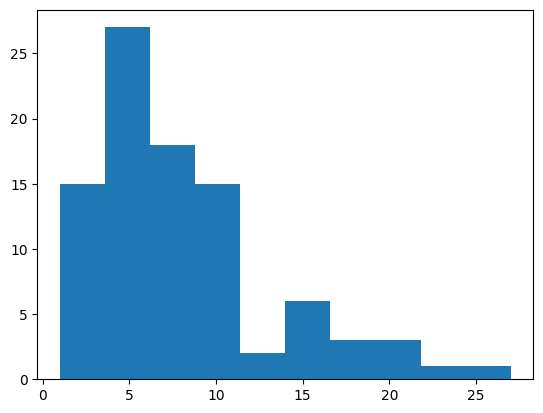

In [6]:
import matplotlib.pyplot as plt
class_dict
plt.hist(class_dict.values())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


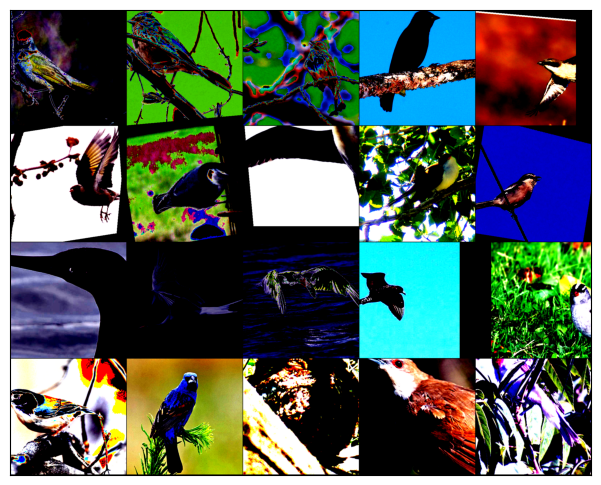

In [2]:
from utils import show_batch
show_batch(train)

In [3]:
from datasets.get_stats import get_stats

mean, std = get_stats(train)

100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


In [4]:
print(mean, std)

tensor([0.0309, 0.0163, 0.0169]) tensor([1.0012, 1.0026, 1.0069])
